<a href="https://colab.research.google.com/github/wenjunsun/Covid-19-analysis-with-uw-ubicomp/blob/master/2020-10/LR_with_propensity_compare_SIP_and_no_SIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. load data

In [ ]:
cd drive/My\ Drive/fall

/content/drive/My Drive/fall


In [ ]:
ls

10-24.ipynb
counties_with_diff_and_all_covariates.csv
counties_with_diff.csv
county_data_with_covariates.csv
county_data_with_reduced_covariates_more_variables.csv
county_data_with_reduced_covariates_with_SIP.csv
county_data_with_reduced_covariates_with_SIP_up_to_5.csv
county_data_with_reduced_covariates_with_SIP_up_to_8.csv
LR_with_propensity_score_buckets.ipynb
more_mutual_info.ipynb
PSM_new.ipynb
standardized_linear_regression.ipynb
what_make_people_change_behavior.ipynb


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('county_data_with_reduced_covariates_with_SIP.csv')

In [ ]:
data.dropna(inplace = True)

In [ ]:
print(f"after dropping this dataset has {data.shape[0]} records.")

after dropping this dataset has 2995 records.


# 1. PSM

In [8]:
%load_ext rpy2.ipython
# For (automatic) translation of Pandas objects to R
from rpy2.robjects import pandas2ri
pandas2ri.activate()

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


In [29]:
%%R
# install standard propensity matching library in R 
install.packages("MatchIt")
# load MatchIt package
library(MatchIt)
# install optimal match package
install.packages('optmatch')
library(optmatch)


R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/MatchIt_3.0.2.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 317607 bytes (310 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[writ

In [67]:
# rename data to dataframe
dataframe = data

In [68]:
# -i means pass in some argument/data from python world to R world
%%R -i dataframe

# using MatchIt package to do PSM - guess it used logistic regression?

m.out <- matchit(SIP.~Median.Household.Income + X..Rural +
                 political_diff+
                 X..Asian + X..Black + 
                 X..Non.Hispanic.White +
                 X..Hispanic + Population_y,
                 method = "full", data = dataframe) 

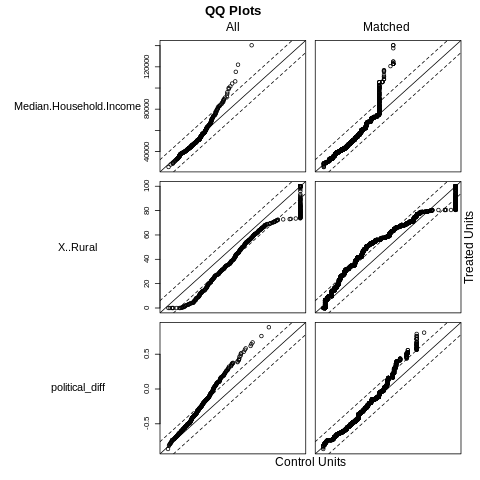

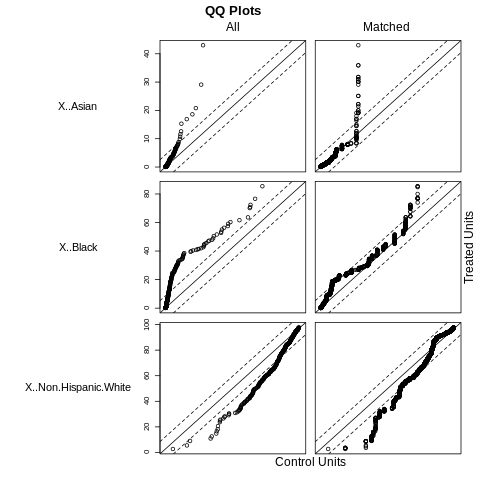

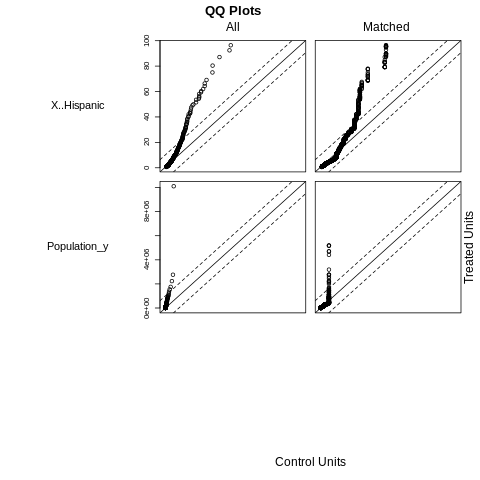

In [69]:
# to see how maching it doing by visualizing distributions
%%R
plot(m.out)

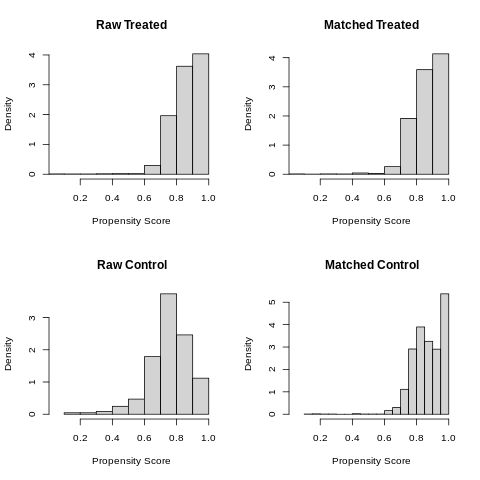

In [70]:
%%R
plot(m.out, type = 'hist')

[1] "To identify the units, use first mouse button; to stop, use second."
integer(0)


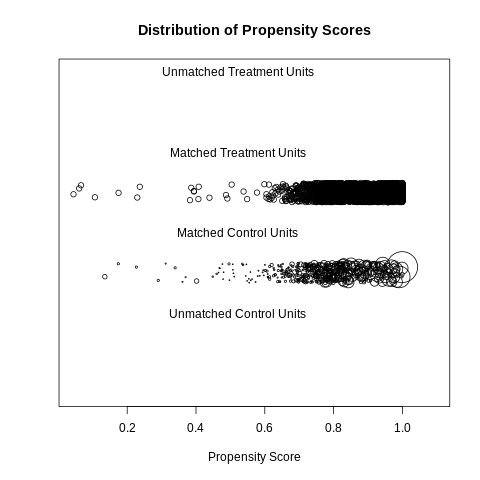

In [71]:
%%R
plot(m.out, type='jitter')

In [72]:
%%R
summary(m.out, standardize=T)


Call:
matchit(formula = SIP. ~ Median.Household.Income + X..Rural + 
    political_diff + X..Asian + X..Black + X..Non.Hispanic.White + 
    X..Hispanic + Population_y, data = dataframe, method = "full")

Summary of balance for all data:
                        Means Treated Means Control Std. Mean Diff. eCDF Med
distance                       0.8676        0.7547          1.1147   0.2988
Median.Household.Income    52991.1876    52921.7584          0.0048   0.0480
X..Rural                      55.2676       64.5125         -0.2978   0.0949
political_diff                -0.2877       -0.4283          0.4492   0.1485
X..Asian                       1.6851        0.9888          0.2323   0.0254
X..Black                      10.2542        4.0293          0.4151   0.0954
X..Non.Hispanic.White         74.8670       82.4000         -0.3679   0.1090
X..Hispanic                   10.2487        6.5177          0.2534   0.0696
Population_y              123128.3980    30946.6018          0.2511 

In [73]:
%%R
# extract matched data.
matched_data <- match.data(m.out)

In [74]:
# import dataframe from R to python.... since I am not familar with manipulating
# R objects 
matched_data = %R matched_data

In [75]:
no_SIP_diff = np.average(matched_data[matched_data['SIP.'] == 0]['diff_in_perc_at_home'], weights = matched_data[matched_data['SIP.'] == 0]['weights'])

In [76]:
SIP_diff = np.average(matched_data[matched_data['SIP.'] == 1]['diff_in_perc_at_home'], weights = matched_data[matched_data['SIP.'] == 1]['weights'])

In [77]:
SIP_diff

0.03318145620033819

In [78]:
no_SIP_diff

0.02198215399177096

In [79]:
SIP_diff - no_SIP_diff

0.011199302208567227

In [80]:
matched_data

,state,state_code,State.Name,cnamelong,county_code,diff_in_perc_at_home,SIP.,Median.Household.Income,X..Rural,Population_y,political_diff,X..less.than.18.years.of.age,X..65.and.over,X..Asian,X..Black,X..Hispanic,X..Non.Hispanic.White,distance,weights,subclass
0,1.0,AL,Alabama,Autauga County,1001.0,0.050678,1,59338.0,42.0,55601,-0.494789,23.7,15.6,1.2,19.3,3.0,74.3,0.840166,1.000000,1.0
1,1.0,AL,Alabama,Baldwin County,1003.0,0.050312,1,57588.0,42.3,218022,-0.577862,21.6,20.4,1.2,8.8,4.6,83.1,0.960092,1.000000,107.0
2,1.0,AL,Alabama,Barbour County,1005.0,0.007037,1,34382.0,67.8,24881,-0.056112,20.9,19.4,0.5,48.0,4.3,45.6,0.971925,1.000000,389.0
3,1.0,AL,Alabama,Bibb County,1007.0,0.011809,1,46064.0,68.4,22400,-0.555441,20.5,16.5,0.2,21.1,2.6,74.6,0.859824,1.000000,86.0
4,1.0,AL,Alabama,Blount County,1009.0,0.038890,1,50412.0,90.0,57840,-0.813820,23.2,18.2,0.3,1.5,9.6,86.9,0.840270,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2991,56.0,WY,Wyoming,Sweetwater County,56037.0,-0.018485,0,73315.0,10.9,43051,-0.535382,26.2,12.1,1.0,1.1,16.1,79.3,0.669064,0.058477,359.0
2992,56.0,WY,Wyoming,Teton County,56039.0,0.075183,1,99087.0,46.4,23081,0.278663,18.4,15.4,1.4,0.6,14.9,81.5,0.797502,1.000000,382.0
2993,56.0,WY,Wyoming,Uinta County,56041.0,0.010157,0,63401.0,43.1,20299,-0.614926,28.8,14.1,0.5,0.7,9.2,87.4,0.662699,0.175432,224.0
2994,56.0,WY,Wyoming,Washakie County,56043.0,-0.007825,0,55190.0,36.0,7885,-0.640377,22.7,21.7,0.8,0.5,14.1,82.4,0.679251,0.701727,145.0


Seems like distance column is the propensity score we want because you can find out [here](https://cran.r-project.org/web/packages/MatchIt/MatchIt.pdf) that without specifying any distance metric the default distance is "logit", which I think is the propensity score we are using.

In [44]:
# max propensity score
matched_data['distance'].max()

0.9999999999999998

In [45]:
matched_data[matched_data['distance'] == matched_data['distance'].max()]

,state,state_code,State.Name,cnamelong,county_code,diff_in_perc_at_home,SIP.,Median.Household.Income,X..Rural,Population_y,political_diff,X..less.than.18.years.of.age,X..65.and.over,X..Asian,X..Black,X..Hispanic,X..Non.Hispanic.White,distance,weights,subclass
89,4.0,AZ,Arizona,Maricopa County,4013.0,0.070350,1,65234.0,2.4,4410824,-0.034465,23.9,15.2,4.6,5.5,31.3,54.9,1.0,1.0,88.0
189,6.0,CA,California,Los Angeles County,6037.0,0.118096,1,67986.0,0.6,10105518,0.480185,21.7,13.6,15.4,8.0,48.6,26.1,1.0,1.0,88.0
200,6.0,CA,California,Orange County,6059.0,0.159275,1,89373.0,0.1,3185968,0.076800,21.9,14.8,21.4,1.6,34.2,40.1,1.0,1.0,88.0
203,6.0,CA,California,Riverside County,6065.0,0.091735,1,66793.0,4.6,2450758,0.043345,25.1,14.4,7.1,6.2,49.6,34.7,1.0,1.0,88.0
207,6.0,CA,California,San Diego County,6073.0,0.128628,1,78777.0,3.3,3343364,0.178358,21.6,14.0,12.6,4.7,34.0,45.2,1.0,1.0,88.0
339,12.0,FL,Florida,Miami-Dade County,12086.0,0.156587,1,52043.0,0.4,2761581,0.295646,20.2,16.2,1.7,15.6,69.1,13.0,1.0,1.0,88.0
579,17.0,IL,Illinois,Cook County,17031.0,0.123588,1,63347.0,0.0,5180493,0.529565,21.8,14.6,7.9,23.0,25.5,42.1,1.0,1.0,153.0
1769,36.0,NY,New York,Kings County,36047.0,0.173891,1,60862.0,0.0,2582830,0.618298,22.8,13.9,12.7,29.9,19.1,36.4,1.0,1.0,88.0
2454,48.0,TX,Texas,Dallas County,48113.0,0.078694,1,59838.0,0.7,2637772,0.262413,26.1,10.7,6.7,22.6,40.5,28.6,1.0,1.0,88.0
2497,48.0,TX,Texas,Harris County,48201.0,0.090368,1,60241.0,1.2,4698619,0.123964,26.6,10.5,7.4,18.8,43.3,29.1,1.0,1.0,88.0


In [46]:
# minimum propensity score
matched_data['distance'].min()

0.0439668014865062

In [47]:
matched_data[matched_data['distance'] == matched_data['distance'].min()]

,state,state_code,State.Name,cnamelong,county_code,diff_in_perc_at_home,SIP.,Median.Household.Income,X..Rural,Population_y,political_diff,X..less.than.18.years.of.age,X..65.and.over,X..Asian,X..Black,X..Hispanic,X..Non.Hispanic.White,distance,weights,subclass
77,2.0,AK,Alaska,Northwest Arctic Borough,2188.0,0.063479,1,59337.0,57.5,7671,-0.151711,35.3,7.3,0.8,1.1,3.8,10.9,0.043967,1.0,189.0


# 2. standardize data for both data_SIP and data_no_SIP

In [48]:
# import packages from LR and standardize tool
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [84]:
# get only numeric columns because we can't scale the strings, etc.
matched_data = matched_data._get_numeric_data()

In [85]:
data_SIP = matched_data[matched_data['SIP.'] == 1]
data_no_SIP = matched_data[matched_data['SIP.'] == 0]

In [87]:
data_SIP

,state,county_code,diff_in_perc_at_home,SIP.,Median.Household.Income,X..Rural,Population_y,political_diff,X..less.than.18.years.of.age,X..65.and.over,X..Asian,X..Black,X..Hispanic,X..Non.Hispanic.White,distance,weights,subclass
0,1.0,1001.0,0.050678,1,59338.0,42.0,55601,-0.494789,23.7,15.6,1.2,19.3,3.0,74.3,0.840166,1.0,1.0
1,1.0,1003.0,0.050312,1,57588.0,42.3,218022,-0.577862,21.6,20.4,1.2,8.8,4.6,83.1,0.960092,1.0,107.0
2,1.0,1005.0,0.007037,1,34382.0,67.8,24881,-0.056112,20.9,19.4,0.5,48.0,4.3,45.6,0.971925,1.0,389.0
3,1.0,1007.0,0.011809,1,46064.0,68.4,22400,-0.555441,20.5,16.5,0.2,21.1,2.6,74.6,0.859824,1.0,86.0
4,1.0,1009.0,0.038890,1,50412.0,90.0,57840,-0.813820,23.2,18.2,0.3,1.5,9.6,86.9,0.840270,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2970,55.0,55135.0,0.018980,1,58648.0,64.9,51128,-0.302460,20.3,20.9,0.6,0.5,3.3,94.1,0.834856,1.0,56.0
2971,55.0,55137.0,-0.019303,1,52340.0,89.5,24263,-0.323301,18.3,24.4,0.6,2.0,6.3,89.6,0.859367,1.0,86.0
2972,55.0,55139.0,0.071851,1,57785.0,13.4,171020,-0.074431,20.5,16.4,3.0,2.2,4.2,88.4,0.945545,1.0,136.0
2973,55.0,55141.0,0.007077,1,55879.0,36.7,73055,-0.192777,21.6,20.6,2.0,0.9,3.1,92.2,0.858234,1.0,86.0


In [88]:
data_no_SIP

,state,county_code,diff_in_perc_at_home,SIP.,Median.Household.Income,X..Rural,Population_y,political_diff,X..less.than.18.years.of.age,X..65.and.over,X..Asian,X..Black,X..Hispanic,X..Non.Hispanic.White,distance,weights,subclass
97,5.0,5001.0,0.002032,0,43887.0,34.7,17769,-0.305821,22.9,19.6,0.8,24.5,3.3,69.5,0.869214,0.701727,373.0
98,5.0,5003.0,0.004202,0,41127.0,51.7,20046,-0.365018,22.9,20.4,0.3,24.5,5.5,68.3,0.896433,2.280612,104.0
99,5.0,5005.0,-0.000820,0,39686.0,65.8,41619,-0.536072,17.7,30.9,0.5,0.4,2.5,94.5,0.826325,4.034929,393.0
100,5.0,5007.0,0.075433,0,68978.0,25.2,272608,-0.348571,26.3,13.4,4.1,1.8,16.9,73.0,0.978450,0.350863,66.0
101,5.0,5009.0,-0.000736,0,44482.0,62.2,37480,-0.584465,22.9,20.7,0.7,0.4,2.6,93.6,0.783349,0.175432,310.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2990,56.0,56035.0,0.042121,0,74570.0,100.0,9813,-0.643472,22.5,19.5,0.7,0.8,7.5,89.0,0.698101,0.175432,76.0
2991,56.0,56037.0,-0.018485,0,73315.0,10.9,43051,-0.535382,26.2,12.1,1.0,1.1,16.1,79.3,0.669064,0.058477,359.0
2993,56.0,56041.0,0.010157,0,63401.0,43.1,20299,-0.614926,28.8,14.1,0.5,0.7,9.2,87.4,0.662699,0.175432,224.0
2994,56.0,56043.0,-0.007825,0,55190.0,36.0,7885,-0.640377,22.7,21.7,0.8,0.5,14.1,82.4,0.679251,0.701727,145.0


Notice that we have state and county_code, which are not our covariates. I include them here to see the random covariate's coefficients in linear model

In [139]:
# function that given a dataframe, standardize its columns except the response
# column and the propensity score column and SIP. column.
def getScaledDataFrame(originalDataFrame):
  scaler = StandardScaler()
  # I here choose not to standardize all variables except
  # the response variable and propensity score
  X = originalDataFrame.drop(['distance', 'diff_in_perc_at_home', 'SIP.'], axis = 1)
  data_scaled = scaler.fit_transform(X)

  df_scaled = pd.DataFrame(data = data_scaled, columns = X.columns)
  df_others = originalDataFrame[['distance', 'diff_in_perc_at_home', 'SIP.']]
  df_others = df_others.reset_index() # make indices have the same type
  df_scaled['distance'] = df_others['distance']
  df_scaled['diff_in_perc_at_home'] = df_others['diff_in_perc_at_home']
  df_scaled['SIP.'] = df_others['SIP.']
  return df_scaled

In [140]:
df_SIP_scaled = getScaledDataFrame(data_SIP)
df_no_SIP_scaled = getScaledDataFrame(data_no_SIP)

In [142]:
df_SIP_scaled

,state,county_code,Median.Household.Income,X..Rural,Population_y,political_diff,X..less.than.18.years.of.age,X..65.and.over,X..Asian,X..Black,X..Hispanic,X..Non.Hispanic.White,weights,subclass,distance,diff_in_perc_at_home,SIP.
0,-1.940256,-1.944251,0.436293,-0.427512,-0.184007,-0.661670,0.564957,-0.742371,-0.161872,0.603283,-0.492360,-0.027700,0.0,-1.413449,0.840166,0.050678,1
1,-1.940256,-1.944119,0.315994,-0.417845,0.258577,-0.927125,-0.074257,0.315894,-0.161872,-0.096984,-0.383682,0.402183,0.0,-0.487893,0.960092,0.050312,1
2,-1.940256,-1.943987,-1.279234,0.403823,-0.267716,0.740110,-0.287328,0.095422,-0.395441,2.517346,-0.404059,-1.429704,0.0,1.974434,0.971925,0.007037,1
3,-1.940256,-1.943855,-0.476189,0.423157,-0.274477,-0.855481,-0.409084,-0.543946,-0.495542,0.723329,-0.519529,-0.013045,0.0,-0.671258,0.859824,0.011809,1
4,-1.940256,-1.943723,-0.177299,1.119158,-0.177906,-1.681121,0.412763,-0.169144,-0.462175,-0.583836,-0.044065,0.587814,0.0,-1.413449,0.840270,0.038890,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2543,1.628682,1.627833,0.388861,0.310379,-0.196195,-0.047087,-0.469961,0.426130,-0.362074,-0.650528,-0.471983,0.939537,0.0,-0.933208,0.834856,0.018980,1
2544,1.628682,1.627965,-0.044764,1.103047,-0.269400,-0.113684,-1.078736,1.197782,-0.362074,-0.550490,-0.268212,0.719710,0.0,-0.671258,0.859367,-0.019303,1
2545,1.628682,1.628097,0.329536,-1.349070,0.130501,0.681572,-0.409084,-0.565993,0.438734,-0.537151,-0.410852,0.661090,0.0,-0.234675,0.945545,0.071851,1
2546,1.628682,1.628229,0.198514,-0.598290,-0.136446,0.303401,-0.074257,0.359989,0.105064,-0.623851,-0.485567,0.846721,0.0,-0.671258,0.858234,0.007077,1


In [143]:
df_no_SIP_scaled

,state,county_code,Median.Household.Income,X..Rural,Population_y,political_diff,X..less.than.18.years.of.age,X..65.and.over,X..Asian,X..Black,X..Hispanic,X..Non.Hispanic.White,weights,subclass,distance,diff_in_perc_at_home,SIP.
0,-1.624969,-1.631264,-0.867019,-1.029871,-0.215834,0.557417,-0.218782,0.030084,-0.148640,2.231206,-0.513438,-0.892770,-0.138463,1.441127,0.869214,0.002032,0
1,-1.624969,-1.631132,-1.131883,-0.442607,-0.178540,0.288070,-0.218782,0.226401,-0.542254,2.231206,-0.162388,-0.975819,0.594478,-0.891081,0.896433,0.004202,0
2,-1.624969,-1.631000,-1.270168,0.044476,0.174802,-0.490229,-1.832161,2.803052,-0.384808,-0.395577,-0.641092,0.837405,1.408856,1.614525,0.826325,-0.000820,0
3,-1.624969,-1.630868,1.540835,-1.358047,3.958142,0.362905,0.836119,-1.491367,2.449213,-0.242984,1.656688,-0.650546,-0.301338,-1.220538,0.978450,0.075433,0
4,-1.624969,-1.630736,-0.809920,-0.079886,0.107010,-0.710417,-0.218782,0.300019,-0.227363,-0.395577,-0.625136,0.775118,-0.382776,0.894922,0.783349,-0.000736,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,1.737509,1.736176,2.077471,1.225911,-0.346145,-0.978903,-0.342888,0.005545,-0.227363,-0.351979,0.156748,0.456766,-0.382776,-1.133839,0.698101,0.042121,0
443,1.737509,1.736308,1.957035,-1.852039,0.198256,-0.487090,0.805093,-1.810381,0.008806,-0.319280,1.529034,-0.214542,-0.437068,1.319748,0.669064,-0.018485,0
444,1.737509,1.736572,1.005639,-0.739693,-0.174396,-0.849018,1.611782,-1.319590,-0.384808,-0.362878,0.428014,0.346035,-0.382776,0.149309,0.662699,0.010157,0
445,1.737509,1.736704,0.217672,-0.984962,-0.377723,-0.964819,-0.280835,0.545414,-0.148640,-0.384677,1.209897,0.000000,-0.138463,-0.535615,0.679251,-0.007825,0


# 3. create bins of propensity scores

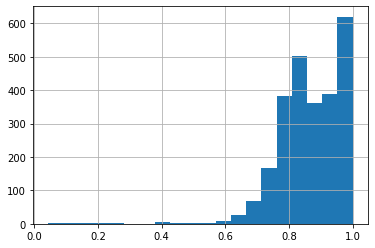

In [144]:
df_SIP_scaled['distance'].hist(bins = 20)

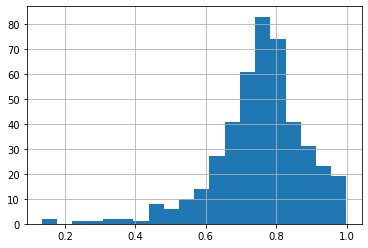

In [145]:
df_no_SIP_scaled['distance'].hist(bins = 20)

In [159]:
# we decided to cup propensity into 3 non-uniform groups to balance
# the number of data points in each group.
bins = pd.IntervalIndex.from_tuples([(0, 0.75), (0.75, 0.85), (0.85, 1)])
# create propensity buckets for df_SIP_scaled
propensity_buckets = pd.cut(df_SIP_scaled['distance'], bins)
df_SIP_scaled['propensity_bucket'] = propensity_buckets

# create propensity buckets for df_SIP_scaled
propensity_buckets = pd.cut(df_no_SIP_scaled['distance'], bins)
df_no_SIP_scaled['propensity_bucket'] = propensity_buckets

In [160]:
df_SIP_scaled.head()

,state,county_code,Median.Household.Income,X..Rural,Population_y,political_diff,X..less.than.18.years.of.age,X..65.and.over,X..Asian,X..Black,X..Hispanic,X..Non.Hispanic.White,weights,subclass,distance,diff_in_perc_at_home,SIP.,propensity_bucket
0,-1.940256,-1.944251,0.436293,-0.427512,-0.184007,-0.661670,0.564957,-0.742371,-0.161872,0.603283,-0.492360,-0.027700,0.0,-1.413449,0.840166,0.050678,1,"(0.75, 0.85]"
1,-1.940256,-1.944119,0.315994,-0.417845,0.258577,-0.927125,-0.074257,0.315894,-0.161872,-0.096984,-0.383682,0.402183,0.0,-0.487893,0.960092,0.050312,1,"(0.85, 1.0]"
2,-1.940256,-1.943987,-1.279234,0.403823,-0.267716,0.740110,-0.287328,0.095422,-0.395441,2.517346,-0.404059,-1.429704,0.0,1.974434,0.971925,0.007037,1,"(0.85, 1.0]"
3,-1.940256,-1.943855,-0.476189,0.423157,-0.274477,-0.855481,-0.409084,-0.543946,-0.495542,0.723329,-0.519529,-0.013045,0.0,-0.671258,0.859824,0.011809,1,"(0.85, 1.0]"
4,-1.940256,-1.943723,-0.177299,1.119158,-0.177906,-1.681121,0.412763,-0.169144,-0.462175,-0.583836,-0.044065,0.587814,0.0,-1.413449,0.840270,0.038890,1,"(0.75, 0.85]"


In [161]:
df_no_SIP_scaled.head()

,state,county_code,Median.Household.Income,X..Rural,Population_y,political_diff,X..less.than.18.years.of.age,X..65.and.over,X..Asian,X..Black,X..Hispanic,X..Non.Hispanic.White,weights,subclass,distance,diff_in_perc_at_home,SIP.,propensity_bucket
0,-1.624969,-1.631264,-0.867019,-1.029871,-0.215834,0.557417,-0.218782,0.030084,-0.148640,2.231206,-0.513438,-0.892770,-0.138463,1.441127,0.869214,0.002032,0,"(0.85, 1.0]"
1,-1.624969,-1.631132,-1.131883,-0.442607,-0.178540,0.288070,-0.218782,0.226401,-0.542254,2.231206,-0.162388,-0.975819,0.594478,-0.891081,0.896433,0.004202,0,"(0.85, 1.0]"
2,-1.624969,-1.631000,-1.270168,0.044476,0.174802,-0.490229,-1.832161,2.803052,-0.384808,-0.395577,-0.641092,0.837405,1.408856,1.614525,0.826325,-0.000820,0,"(0.75, 0.85]"
3,-1.624969,-1.630868,1.540835,-1.358047,3.958142,0.362905,0.836119,-1.491367,2.449213,-0.242984,1.656688,-0.650546,-0.301338,-1.220538,0.978450,0.075433,0,"(0.85, 1.0]"
4,-1.624969,-1.630736,-0.809920,-0.079886,0.107010,-0.710417,-0.218782,0.300019,-0.227363,-0.395577,-0.625136,0.775118,-0.382776,0.894922,0.783349,-0.000736,0,"(0.75, 0.85]"


# 4. linear regression in each bucket for both df_SIP and df_no_SIP

In [182]:
# given a dataframe, print out results of the linear regression
# on each propensity buckets. Assume such propensity bucket
# exists as a column of the dataframe
def linearRegressionOnBuckets(df_scaled):
  regressor = LinearRegression()
  # if this dataframe's column of SIP. includes 1, means it it dataframe with shelter in place.
  if 1 in df_scaled['SIP.'].unique():
    print('results for shelter in place counties:')
  else:
    print('results for counties without shelter in place')
  print()
  for bin in sorted(df_scaled['propensity_bucket'].unique()):
    data_in_this_bin = df_scaled[df_scaled['propensity_bucket'] == bin]
    X = data_in_this_bin.drop(['diff_in_perc_at_home', 'weights', 'subclass', \
                              'distance', 'propensity_bucket', 'county_code', 'state', 'SIP.'], axis = 1)
    y = data_in_this_bin['diff_in_perc_at_home']
    num_of_data_points = data_in_this_bin.shape[0]
    print(f'propensity score from {bin.left} to {bin.right} has {num_of_data_points} data points')
    regressor.fit(X, y)
    # argsort so we can see the most important coefficient of linear regression first
    for i in np.argsort(regressor.coef_)[::-1]:
      coef = regressor.coef_[i]
      print(f'after standardization, feature {X.columns[i]}\' coefficient is {coef} in this bucket')
    print()

In [184]:
linearRegressionOnBuckets(df_scaled=df_SIP_scaled)

results for shelter in place counties:

propensity score from 0.0 to 0.75 has 235 data points
after standardization, feature Population_y' coefficient is 0.20015659250339632 in this bucket
after standardization, feature Median.Household.Income' coefficient is 0.023290309142901047 in this bucket
after standardization, feature X..Black' coefficient is 0.018145193809294424 in this bucket
after standardization, feature X..Non.Hispanic.White' coefficient is 0.00802034965658005 in this bucket
after standardization, feature X..65.and.over' coefficient is 0.006129137745400021 in this bucket
after standardization, feature political_diff' coefficient is 0.0035406644829621093 in this bucket
after standardization, feature X..less.than.18.years.of.age' coefficient is 0.0023208300358375554 in this bucket
after standardization, feature X..Rural' coefficient is 0.0004480380618817513 in this bucket
after standardization, feature X..Asian' coefficient is -0.004049293707069547 in this bucket
after standa

In [185]:
linearRegressionOnBuckets(df_scaled=df_no_SIP_scaled)

results for counties without shelter in place

propensity score from 0.0 to 0.75 has 196 data points
after standardization, feature Population_y' coefficient is 0.027128938874876402 in this bucket
after standardization, feature political_diff' coefficient is 0.010848067061164401 in this bucket
after standardization, feature Median.Household.Income' coefficient is 0.010271737636388044 in this bucket
after standardization, feature X..Rural' coefficient is 0.004407220250610888 in this bucket
after standardization, feature X..65.and.over' coefficient is 0.003971579215472023 in this bucket
after standardization, feature X..Hispanic' coefficient is 0.0033637686791524075 in this bucket
after standardization, feature X..Black' coefficient is 0.0020853350881011863 in this bucket
after standardization, feature X..Non.Hispanic.White' coefficient is -0.00011909795769321843 in this bucket
after standardization, feature X..less.than.18.years.of.age' coefficient is -0.00017340037819897646 in this buc

We can see in `df_SIP_scaled`, populatoin has `0.2` linear regression coefficient within the first propensity bucket! which is bigger than `0.16` we've seen last time. In contrast, `df_no_SIP_scaled` only has coefficient of `0.02` for population in the first bucket. This is interesting. \\
number of data points in `df_no_SIP_scaled` are around 100 in each bucket, which is not too bad. \\
Also we can see that `median household income` is more important in `df_SIP_scaled`, as it has about `0.02` coefficient in all buckets, while `df_no_SIP_scaled` only has about `0.01` for `median household income`. \\
What does this all mean? Somehow population has a bigger impact in shelter in place counties with low propensity scores???